Import of necessary packages/libraries

In [1]:
import numpy as np
import pandas as pd 
import sklearn as sl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yfinance as yf

Version check

In [2]:
numpy_version = np.__version__
pandas_version = pd.__version__
sklearn_version = sl.__version__
matplotlib_version = matplotlib.__version__
seaborn_version = sns.__version__
yahoo_version = yf.__version__
print(f"Numpy version: {numpy_version}")
print(f"Pandas version: {pandas_version}")
print(f"Sklearn version: {sklearn_version}")
print(f"Matplotlib version: {matplotlib_version}")
print(f"Seaborn version: {seaborn_version}")
print(f"yFinance version: {yahoo_version}")

Numpy version: 2.3.5
Pandas version: 2.3.3
Sklearn version: 1.7.1
Matplotlib version: 3.10.6
Seaborn version: 0.13.2
yFinance version: 0.2.66


Import of data

In [3]:
df = pd.read_excel(r"Top5_Indices.xlsx", sheet_name = "Trading Days")
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date  Numeric Date      S&P 500  S&P 500 % Return     Dow Jones  \
0 2000-01-03             1  1455.219971          0.000000  11357.509766   
1 2000-01-04             2  1399.420044         -0.038345  10997.929688   
2 2000-01-05             3  1402.109985          0.001922  11122.650391   
3 2000-01-06             4  1403.449951          0.000956  11253.259766   
4 2000-01-07             5  1441.469971          0.027090  11522.559570   

   Dow Jones % Return  Nasdaq Composite  Nasdaq Composite % Return  \
0            0.000000       4131.149902                   0.000000   
1           -0.031660       3901.689941                  -0.055544   
2            0.011340       3877.540039                  -0.006190   
3            0.011743       3727.129883                  -0.038790   
4            0.023931       3882.620117                   0.041718   

   Russell 2000  Russell 2000 % Return   Nasdaq 100  Nasdaq 100 % Return  
0    496.420013               0.000000  3790.550049  

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6522 entries, 0 to 6521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       6522 non-null   datetime64[ns]
 1   Numeric Date               6522 non-null   int64         
 2   S&P 500                    6522 non-null   float64       
 3   S&P 500 % Return           6522 non-null   float64       
 4   Dow Jones                  6522 non-null   float64       
 5   Dow Jones % Return         6522 non-null   float64       
 6   Nasdaq Composite           6522 non-null   float64       
 7   Nasdaq Composite % Return  6522 non-null   float64       
 8   Russell 2000               6522 non-null   float64       
 9   Russell 2000 % Return      6522 non-null   float64       
 10  Nasdaq 100                 6522 non-null   float64       
 11  Nasdaq 100 % Return        6522 non-null   float64       
dtypes: dat

In [5]:
print(df.shape)

(6522, 12)


Polynomial Regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Polynomial degrees to test
degrees = [1, 2, 3, 4, 5]

# Targets
targets = {
    "S&P 500": df['S&P 500'].values,
    "Dow Jones": df['Dow Jones'].values,
    "Nasdaq Composite": df['Nasdaq Composite'].values,
    "Russell 2000": df['Russell 2000'].values,
    "Nasdaq 100": df['Nasdaq 100'].values
}

# Feature
X = df["Numeric Date"].values.reshape(-1,1)

# Store results
results = {name: {} for name in targets.keys()}

# Calculate MSE and RMSE for all indices
for name, y in targets.items():
    for d in degrees:
        poly = PolynomialFeatures(degree=d)
        X_poly = poly.fit_transform(X)
        model = LinearRegression().fit(X_poly, y)
        y_pred = model.predict(X_poly)

        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        results[name][d] = {"MSE": mse, "RMSE": rmse}

# Print results nicely
for name, metrics in results.items():
    print(f"--- {name} ---")
    for degree, vals in metrics.items():
        print(f"Degree {degree}: MSE = {vals['MSE']:.2f}, RMSE = {vals['RMSE']:.2f}")
    print()


--- S&P 500 ---
Degree 1: MSE = 520039.08, RMSE = 721.14
Degree 2: MSE = 77892.44, RMSE = 279.09
Degree 3: MSE = 60561.40, RMSE = 246.09
Degree 4: MSE = 60610.91, RMSE = 246.19
Degree 5: MSE = 61230.78, RMSE = 247.45

--- Dow Jones ---
Degree 1: MSE = 19877509.95, RMSE = 4458.42
Degree 2: MSE = 2975491.84, RMSE = 1724.96
Degree 3: MSE = 2843031.89, RMSE = 1686.13
Degree 4: MSE = 2780403.68, RMSE = 1667.45
Degree 5: MSE = 2803100.55, RMSE = 1674.25

--- Nasdaq Composite ---
Degree 1: MSE = 7553570.06, RMSE = 2748.38
Degree 2: MSE = 1267976.59, RMSE = 1126.04
Degree 3: MSE = 1071664.66, RMSE = 1035.21
Degree 4: MSE = 1086717.18, RMSE = 1042.46
Degree 5: MSE = 1105355.70, RMSE = 1051.36

--- Russell 2000 ---
Degree 1: MSE = 43315.32, RMSE = 208.12
Degree 2: MSE = 24782.15, RMSE = 157.42
Degree 3: MSE = 24169.11, RMSE = 155.46
Degree 4: MSE = 23334.30, RMSE = 152.76
Degree 5: MSE = 23286.51, RMSE = 152.60

--- Nasdaq 100 ---
Degree 1: MSE = 10290526.46, RMSE = 3207.89
Degree 2: MSE = 15231

Given the negligible difference in MSE/RMSE between 3rd and 4th degree polynomials for all indices, a 3rd-degree polynomial regression was selected for simplicity and to avoid overfitting.

In [7]:
# Feature (X)
X = df['Numeric Date'].values.reshape(-1, 1)

# Targets (y’s)
targets = {
    "S&P 500": df['S&P 500'].values,
    "Dow Jones": df['Dow Jones'].values,
    "Nasdaq Composite": df['Nasdaq Composite'].values,
    "Russell 2000": df['Russell 2000'].values,
    "Nasdaq 100": df['Nasdaq 100'].values,
}

# Choose polynomial degree
degree = 3

# Polynomial transformer
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Store results
models = {}
predictions = {}
errors = {}

# -------------------------------
# Fit polynomial model for each index
# -------------------------------
for name, y in targets.items():
    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    models[name] = model
    predictions[name] = y_pred
    errors[name] = mean_squared_error(y, y_pred)

    print(f"--- {name} ---")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("MSE:", errors[name])
    print()

# -------------------------------
# Predict the NEXT N DAYS
# -------------------------------
N = 365  # <--- CHANGE this to however many future days you want

last_numeric_date = df['Numeric Date'].max()

future_numeric = np.arange(
    last_numeric_date + 1,
    last_numeric_date + N + 1
).reshape(-1, 1)

future_poly = poly.transform(future_numeric)

# Store future predictions
future_predictions = {
    "Numeric Date": future_numeric.flatten()
}

print("\nFuture Predictions:")
for name, model in models.items():
    pred = model.predict(future_poly)
    future_predictions[name] = pred
    print(f"{name}: First future value = {pred[0]:.2f}")

# Convert results to a dataframe if needed
future_df = pd.DataFrame(future_predictions)


--- S&P 500 ---
Coefficients: [ 0.00000000e+00 -4.63352637e-02 -1.69455125e-05  8.19719019e-09]
Intercept: 1243.0154659072582
MSE: 60561.39976709827

--- Dow Jones ---
Coefficients: [ 0.00000000e+00 -1.17194460e+00  2.93237705e-04  2.26618322e-08]
Intercept: 10868.782002115586
MSE: 2843031.8941175113

--- Nasdaq Composite ---
Coefficients: [ 0.00000000e+00 -4.49615816e-01 -1.67541087e-05  2.75883721e-08]
Intercept: 2760.6466377176957
MSE: 1071664.6640701261

--- Russell 2000 ---
Coefficients: [ 0.00000000e+00 -7.57890681e-02  4.22683130e-05 -1.54168629e-09]
Intercept: 535.0961796196366
MSE: 24169.110953803684

--- Nasdaq 100 ---
Coefficients: [ 0.00000000e+00 -1.80967631e-01 -1.45361419e-04  4.14232206e-08]
Intercept: 2281.424294842199
MSE: 1080566.9921973636


Future Predictions:
S&P 500: First future value = 6246.23
Dow Jones: First future value = 45314.49
Nasdaq Composite: First future value = 20430.46
Russell 2000: First future value = 2298.71
Nasdaq 100: First future value = 22711

In [8]:
print("\nFuture prediction table (head):")
print(future_df.head(25))


Future prediction table (head):
    Numeric Date      S&P 500     Dow Jones  Nasdaq Composite  Russell 2000  \
0           9470  6246.226006  45314.486279      20430.462172   2298.713612   
1           9471  6248.064333  45324.966195      20437.118450   2299.023604   
2           9472  6249.903092  45335.447984      20443.776263   2299.333592   
3           9473  6251.742282  45345.931648      20450.435610   2299.643578   
4           9474  6253.581905  45356.417186      20457.096492   2299.953561   
5           9475  6255.421960  45366.904599      20463.758908   2300.263540   
6           9476  6257.262447  45377.393887      20470.422860   2300.573516   
7           9477  6259.103366  45387.885050      20477.088346   2300.883490   
8           9478  6260.944717  45398.378087      20483.755368   2301.193460   
9           9479  6262.786501  45408.873000      20490.423925   2301.503427   
10          9480  6264.628717  45419.369789      20497.094017   2301.813390   
11          9481  6

Plotting Graph of Real vs Predicted Data

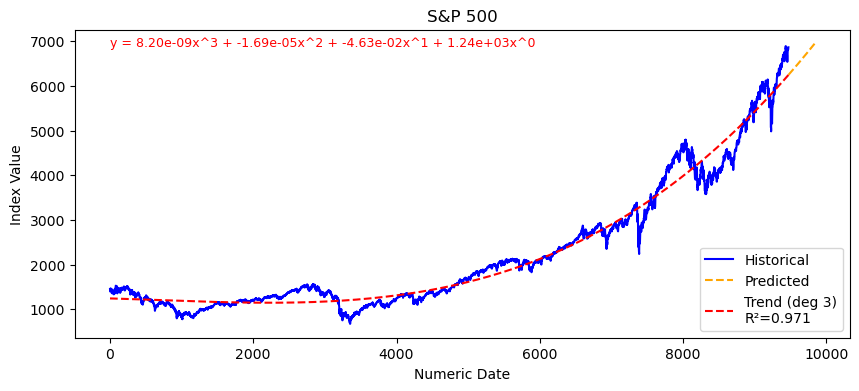

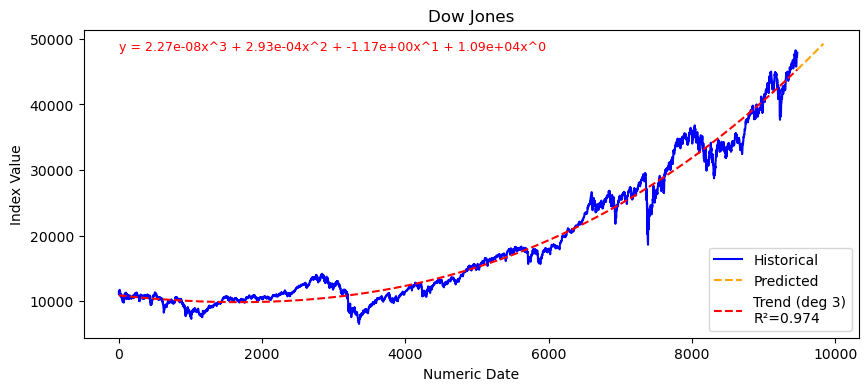

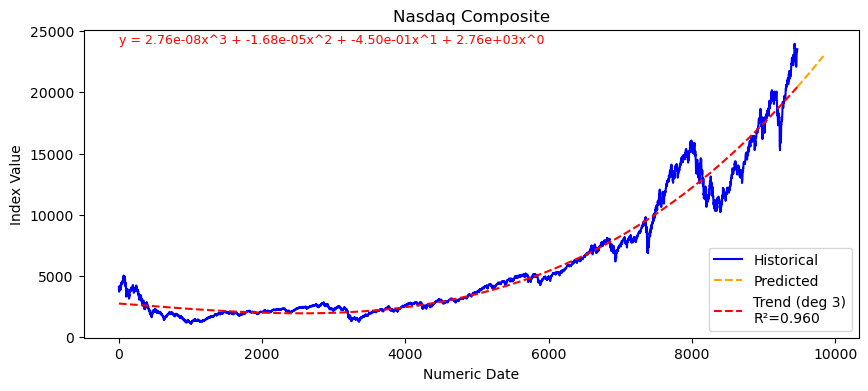

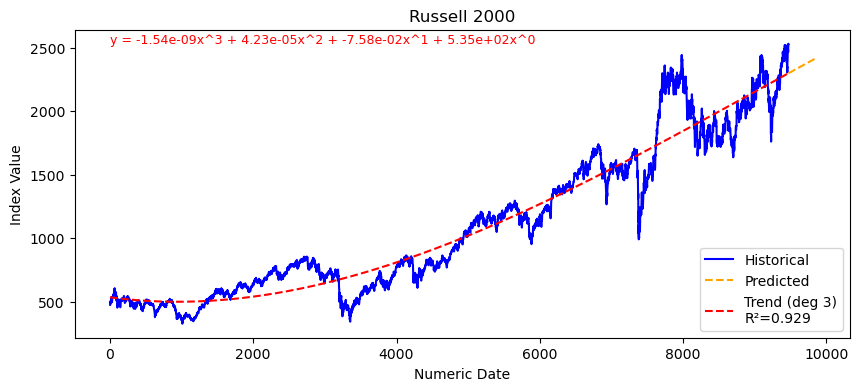

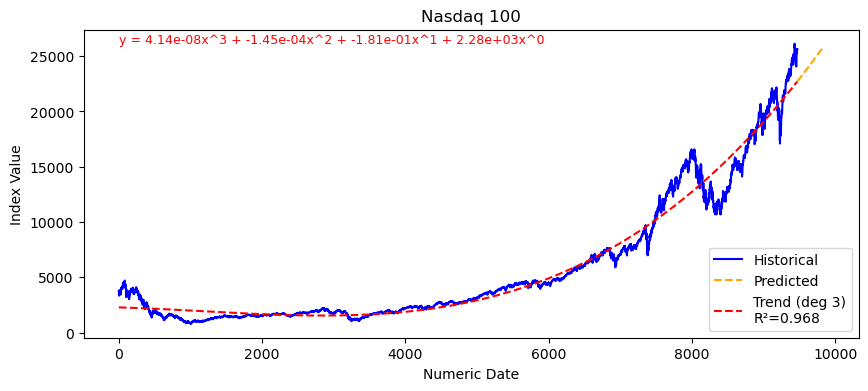

In [9]:
degree = 3

columns = ["S&P 500", "Dow Jones", "Nasdaq Composite", "Russell 2000", "Nasdaq 100"]

for col in columns:
    plt.figure(figsize=(10,4))
    
    # Historical data
    x_hist = df["Numeric Date"]
    y_hist = df[col]
    plt.plot(x_hist, y_hist, label="Historical", color="blue")
    
    # Predicted data
    x_pred = future_df["Numeric Date"]
    y_pred = future_df[col]
    plt.plot(x_pred, y_pred, label="Predicted", color="orange", linestyle='--')
    
    # Polynomial fit
    coeffs = np.polyfit(x_hist, y_hist, degree)
    p = np.poly1d(coeffs)
    y_trend = p(x_hist)
    
    # Calculate R^2
    residuals = y_hist - y_trend
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_hist - np.mean(y_hist))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Plot trendline
    plt.plot(x_hist, y_trend, "r--", label=f"Trend (deg {degree})\nR²={r_squared:.3f}")
    
    # Display equation on plot
    eq_text = "y = " + " + ".join([f"{coeff:.2e}x^{degree-i}" for i, coeff in enumerate(coeffs)])
    plt.text(x_hist.min(), y_hist.max(), eq_text, fontsize=9, color='red')
    
    plt.title(col)
    plt.xlabel("Numeric Date")
    plt.ylabel("Index Value")
    plt.legend()
    plt.show()


The predictions depict a fall of all stocks before a steady increase back up to peak values shown in 2025 for 2026

Heatmap of Correlation (% Return)

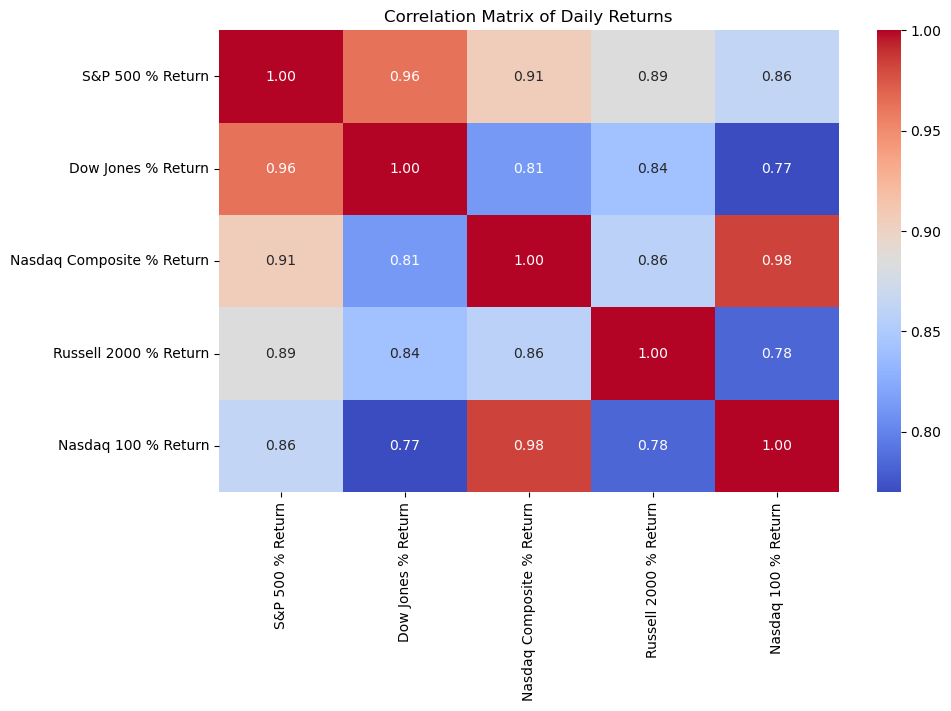

,S&P 500 % Return,Dow Jones % Return,Nasdaq Composite % Return,Russell 2000 % Return,Nasdaq 100 % Return
S&P 500 % Return,1.000000,0.962288,0.905340,0.885591,0.863875
Dow Jones % Return,0.962288,1.000000,0.812273,0.840938,0.769850
Nasdaq Composite % Return,0.905340,0.812273,1.000000,0.858382,0.983686
Russell 2000 % Return,0.885591,0.840938,0.858382,1.000000,0.784023
Nasdaq 100 % Return,0.863875,0.769850,0.983686,0.784023,1.000000


In [10]:
return_cols = [
    'S&P 500 % Return',
    'Dow Jones % Return',
    'Nasdaq Composite % Return',
    'Russell 2000 % Return',
    'Nasdaq 100 % Return'
]

returns = df[return_cols]

corr_return = returns.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_return, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Daily Returns")
plt.show()

corr_return

This heatmap shows the correlation coefficients between five major U.S. stock indices: S&P 500, Dow Jones, Nasdaq Composite, Russell 2000, and Nasdaq 100:

S&P 500 has a correlations above 0.85 for all other markets including a strong 0.96 with Dow Jones. Both represent large-cap U.S. companies/the same segment of the market.

Nasdaq Composite and Nasdaq 100 has the highest correlation with 0.98. Nasdaq 100 is a subset of the Nasdaq Composite so this pattern fits.

S&P 500 and Nasdaq Composite has a correlation of 0.90. Tech significantly influences the S&P, however, the S&P is more diversified (healthcare, financials, energy, etc.), so correlation isn’t perfect.

Russell 2000 tracks smaller-cap companies, which explains the slightly weaker correlation compared to large-cap indices (0.78 to 0.88). Small-cap stocks behave differently making it the odd man out compared to the others.

The markets are strongly interconnected.

Diversifying only among these indices offers limited risk reduction, since most move together.

Small-cap stocks (Russell 2000) provide slightly different behavior, which could offer a small diversification benefit.

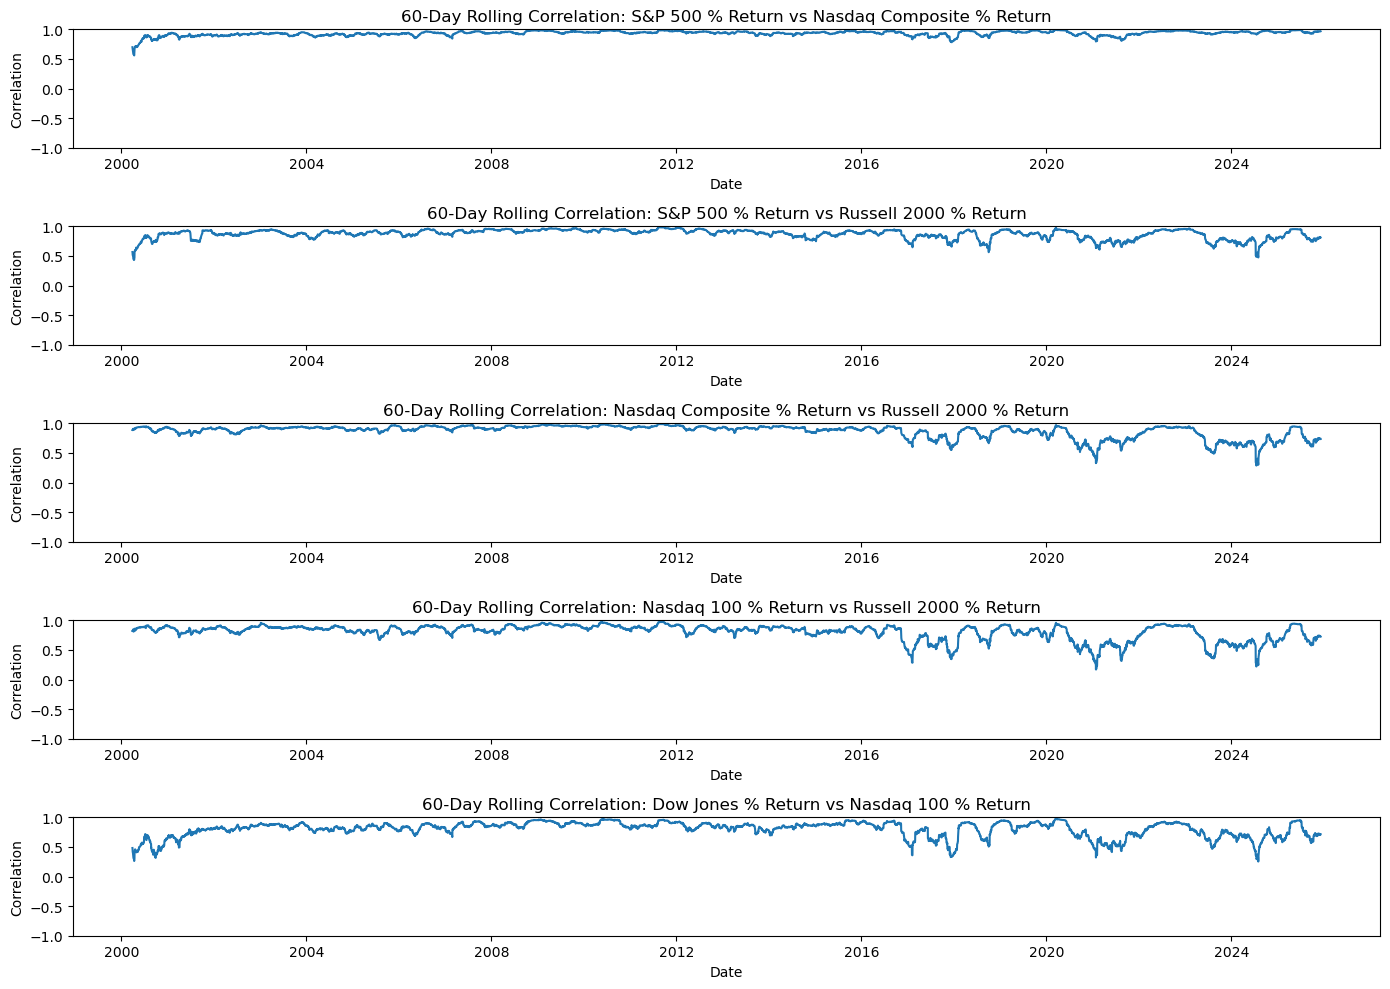

In [11]:
window = 60  # 60-day rolling correlation

pairs = [
    ('S&P 500 % Return', 'Nasdaq Composite % Return'),
    ('S&P 500 % Return', 'Russell 2000 % Return'),
    ('Nasdaq Composite % Return', 'Russell 2000 % Return'),
    ('Nasdaq 100 % Return', 'Russell 2000 % Return'),
    ('Dow Jones % Return', 'Nasdaq 100 % Return')
]

plt.figure(figsize=(14,10))

for i, (col1, col2) in enumerate(pairs, 1):
    rolling_corr = df[col1].rolling(window).corr(df[col2])
    
    plt.subplot(len(pairs), 1, i)
    plt.plot(df['Date'], rolling_corr)
    plt.title(f'{window}-Day Rolling Correlation: {col1} vs {col2}')
    plt.ylabel("Correlation")
    plt.xlabel("Date")
    plt.ylim(-1,1)

plt.tight_layout()
plt.show()


S&P 500 ↔ Nasdaq Composite → shows tech vs broad market

S&P 500 ↔ Russell 2000 → shows large vs small cap behavior

Nasdaq Composite ↔ Russell 2000 → tech vs small cap

Nasdaq 100 ↔ Russell 2000 → tech-heavy vs small cap

Dow ↔ Nasdaq 100 → old economy vs tech


The 60-day rolling correlation between these paired indexes are showed above. While the majority of the graph shows a high rolling correlation, it is not constant with noticeable peaks and valleys. Peaks in the rolling correlations indicate periods where the indexes move closely together, often reflecting strong macroeconomic drivers, broad market rallies, or systemic shocks when all sectors react in unison. Valleys, on the other hand, highlight periods of divergence, where certain indexes behave differently from the broader market, often due to sector rotations, earnings-specific events, or changes in investor sentiment.

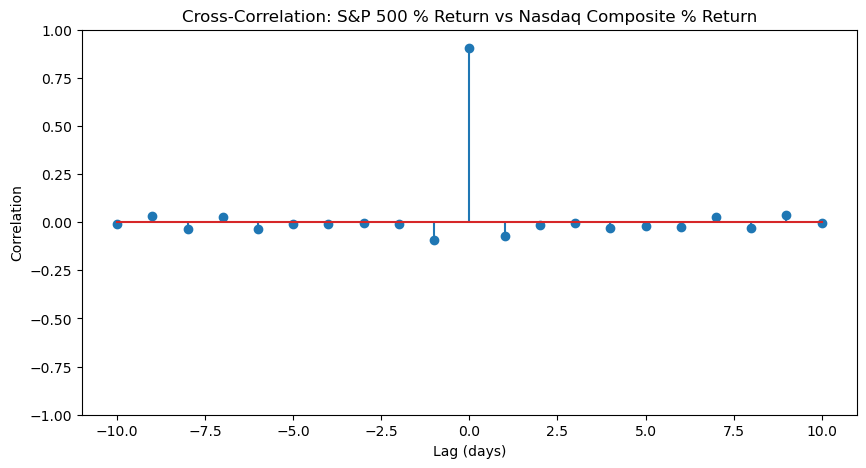

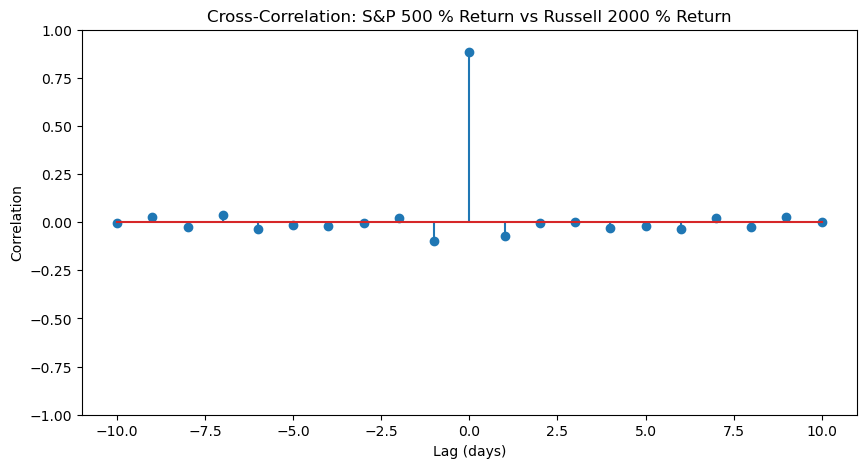

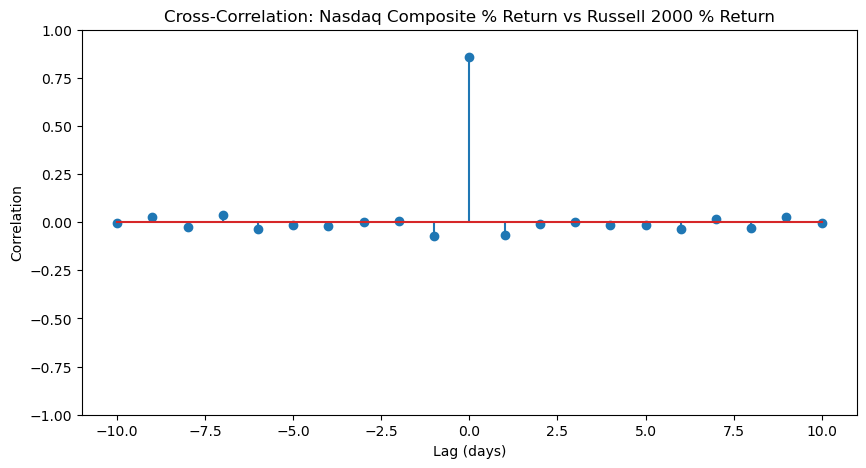

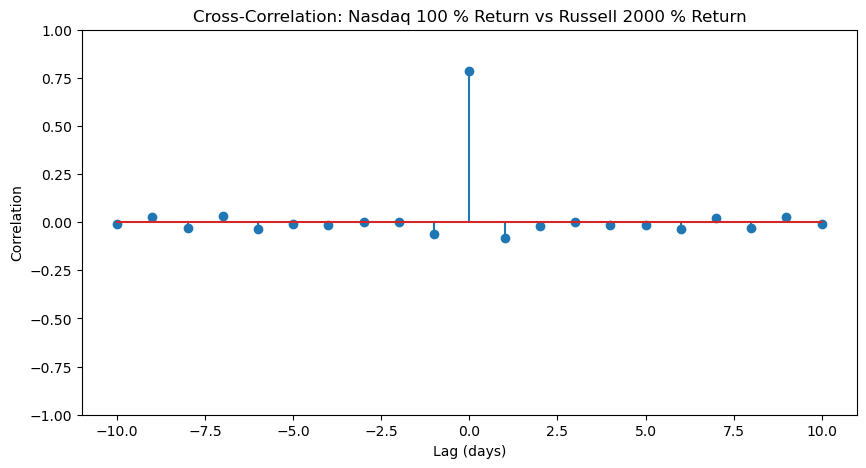

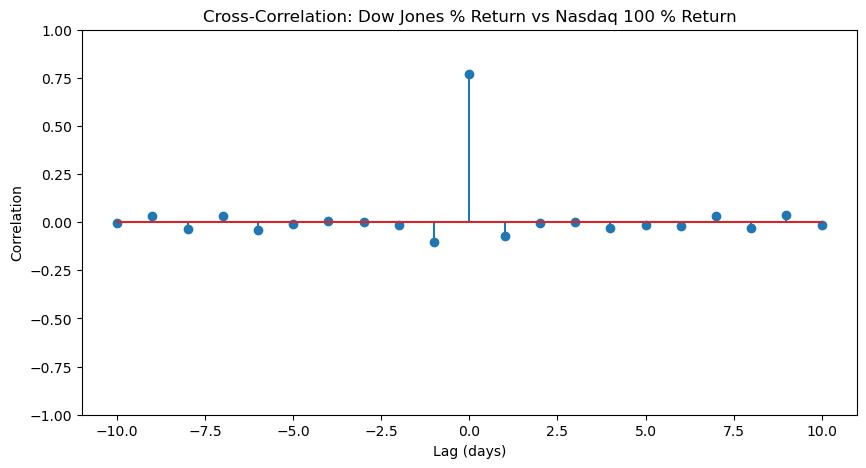

In [12]:
pairs = [
    ('S&P 500 % Return', 'Nasdaq Composite % Return'),
    ('S&P 500 % Return', 'Russell 2000 % Return'),
    ('Nasdaq Composite % Return', 'Russell 2000 % Return'),
    ('Nasdaq 100 % Return', 'Russell 2000 % Return'),
    ('Dow Jones % Return', 'Nasdaq 100 % Return')
]

lags = range(-10, 11)  # Lag window: -10 to +10 days

# Loop through each pair and plot the cross-correlation
for col1, col2 in pairs:
    series1 = df[col1].dropna()
    series2 = df[col2].dropna()
    
    cross_corr = [series1.corr(series2.shift(lag)) for lag in lags]
    
    plt.figure(figsize=(10,5))
    plt.stem(lags, cross_corr)
    plt.title(f"Cross-Correlation: {col1} vs {col2}")
    plt.xlabel("Lag (days)")
    plt.ylabel("Correlation")
    plt.ylim(-1,1)  # Keep consistent y-axis
    plt.show()


The cross-correlation analysis shows that nearly all index pairs have the strongest correlation at lag 0, indicating that the indexes move together on the same day. Smaller differences at positive or negative lags suggest only minor lead-lag behavior, meaning that none of these indexes consistently leads the others by multiple days.

Risk

In [13]:
returns_cols = [
    'S&P 500 % Return',
    'Dow Jones % Return',
    'Nasdaq Composite % Return',
    'Russell 2000 % Return',
    'Nasdaq 100 % Return'
]

returns = df[returns_cols]


In [14]:
volatility = returns.std() * np.sqrt(252)
print("Annualized Volatility:")
print(volatility)


Annualized Volatility:
S&P 500 % Return             0.193828
Dow Jones % Return           0.183947
Nasdaq Composite % Return    0.249318
Russell 2000 % Return        0.244109
Nasdaq 100 % Return          0.273723
dtype: float64


With 252 trading days in the year, the annualized volatility provides a measure of perceived risk. Among the major indexes, the Nasdaq 100 has the highest volatility at 0.27, indicating larger daily fluctuations and higher risk, while the Dow Jones has the lowest at 0.18, reflecting comparatively more stable movements.

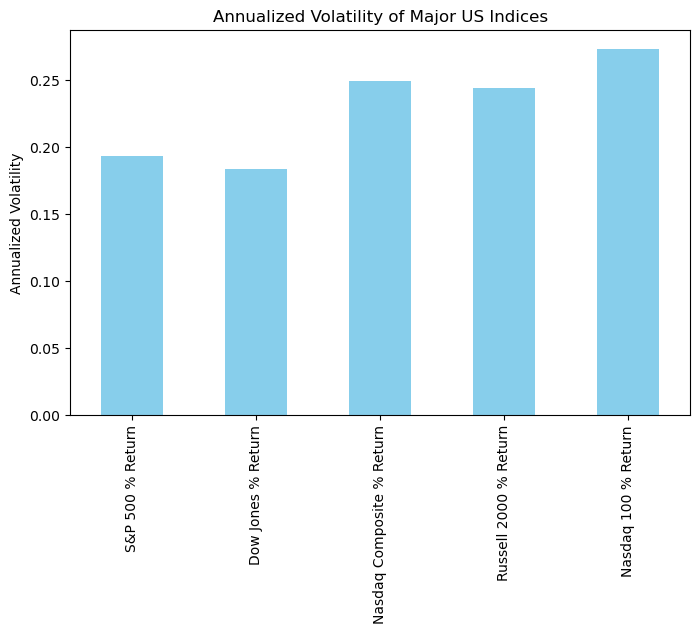

In [15]:
volatility.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.ylabel("Annualized Volatility")
plt.title("Annualized Volatility of Major US Indices")
plt.show()


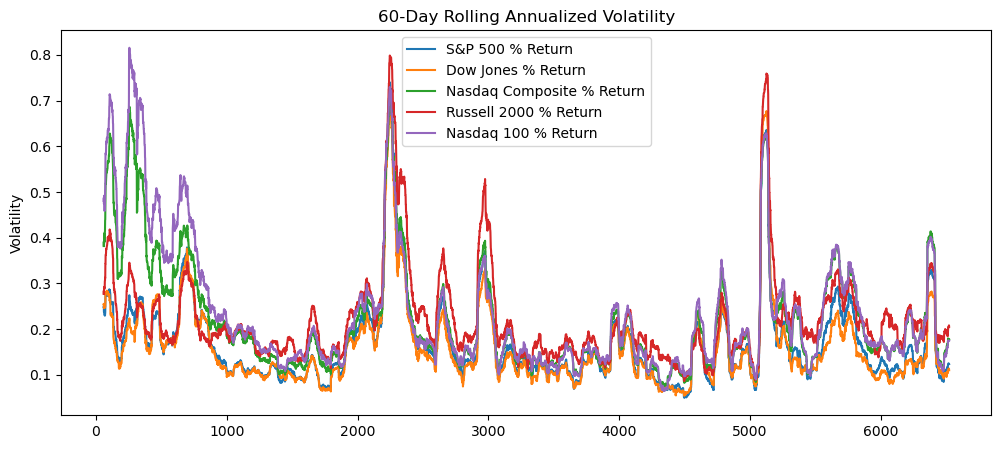

In [16]:
rolling_vol = returns.rolling(window=60).std() * np.sqrt(252)
rolling_vol.plot(figsize=(12,5))
plt.title("60-Day Rolling Annualized Volatility")
plt.ylabel("Volatility")
plt.show()


In [17]:
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
sharpe_ratio


S&P 500 % Return             0.406313
Dow Jones % Return           0.394520
Nasdaq Composite % Return    0.394167
Russell 2000 % Return        0.380041
Nasdaq 100 % Return          0.406335
dtype: float64

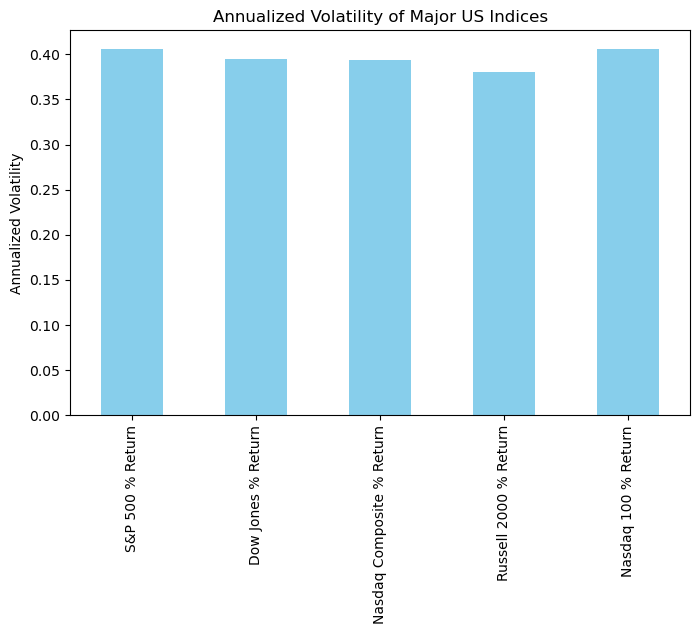

In [18]:
sharpe_ratio.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.ylabel("Annualized Volatility")
plt.title("Annualized Volatility of Major US Indices")
plt.show()

All five major U.S. indexes exhibit moderate positive risk-adjusted returns, with Sharpe ratios ranging from 0.38 for the Russell 2000 to 0.41 for the S&P 500 and Nasdaq 100, indicating that, relative to their volatility, the S&P 500 and Nasdaq 100 have delivered slightly more efficient performance, while the Russell 2000 has been slightly less efficient.

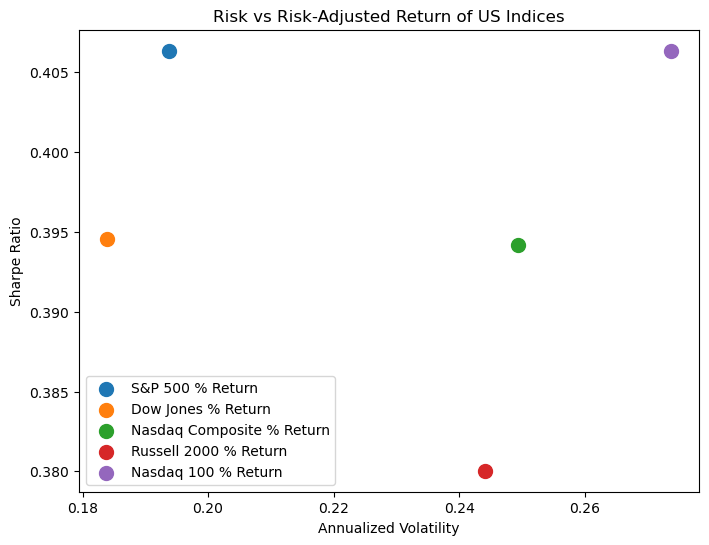

In [19]:
plt.figure(figsize=(8,6))
for idx in volatility.index:
    plt.scatter(volatility[idx], sharpe_ratio[idx], label=idx, s=100)

plt.xlabel("Annualized Volatility")
plt.ylabel("Sharpe Ratio")
plt.title("Risk vs Risk-Adjusted Return of US Indices")
plt.legend()
plt.show()

Higher Sharpe at lower volatility → efficient and stable index

Higher volatility with similar Sharpe → more fluctuations for similar returns

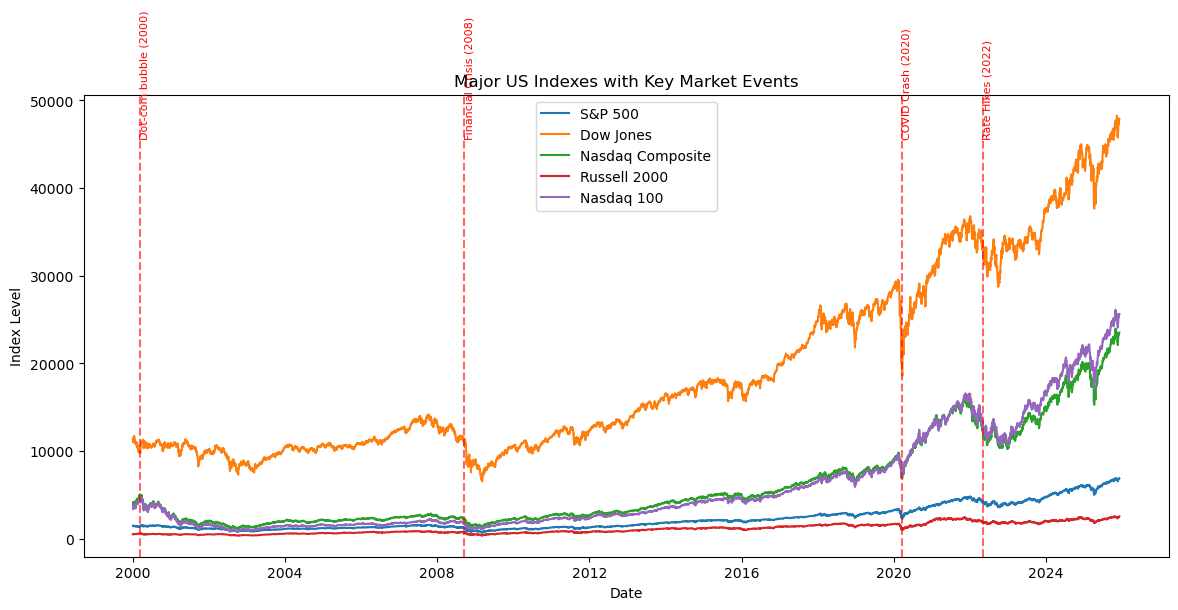

In [24]:
events = {
    'Dot-com bubble (2000)': '2000-03-10',
    'Financial Crisis (2008)': '2008-09-15',
    'COVID Crash (2020)': '2020-03-16',
    'Rate Hikes (2022)': '2022-05-04'
}

index_cols = ["S&P 500", "Dow Jones", "Nasdaq Composite", "Russell 2000", "Nasdaq 100"]

plt.figure(figsize=(14,6))

# Plot all indexes
for col in index_cols:   # <-- use the list of stock index columns
    plt.plot(df['Date'], df[col], label=col)

# Add event lines
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.6)
    plt.text(pd.to_datetime(date), df[index_cols].max().max()*0.95, event,
             rotation=90, color='red', fontsize=8)

plt.title("Major US Indexes with Key Market Events")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend()
plt.show()



In [25]:
window = 30  # days before and after event
results = {}

for event, date in events.items():
    date = pd.to_datetime(date)
    results[event] = {}
    for col in returns_cols:
        vol_window = df[col].rolling(window=60).std() * np.sqrt(252)  # 60-day rolling annualized volatility
        vol_event = vol_window.loc[(df['Date'] >= date - pd.Timedelta(days=window)) &
                                   (df['Date'] <= date + pd.Timedelta(days=window))]
        results[event][col] = vol_event.mean()

# Convert results to DataFrame for easy viewing
event_vol_df = pd.DataFrame(results).T
print(event_vol_df)


                         S&P 500 % Return  Dow Jones % Return  \
Dot-com bubble (2000)            0.237391            0.249522   
Financial Crisis (2008)          0.289623            0.279385   
COVID Crash (2020)               0.397202            0.422475   
Rate Hikes (2022)                0.239459            0.195061   

                         Nasdaq Composite % Return  Russell 2000 % Return  \
Dot-com bubble (2000)                     0.393017               0.285855   
Financial Crisis (2008)                   0.296849               0.330214   
COVID Crash (2020)                        0.400644               0.435875   
Rate Hikes (2022)                         0.336250               0.281245   

                         Nasdaq 100 % Return  
Dot-com bubble (2000)               0.476192  
Financial Crisis (2008)             0.312385  
COVID Crash (2020)                  0.408766  
Rate Hikes (2022)                   0.342650  


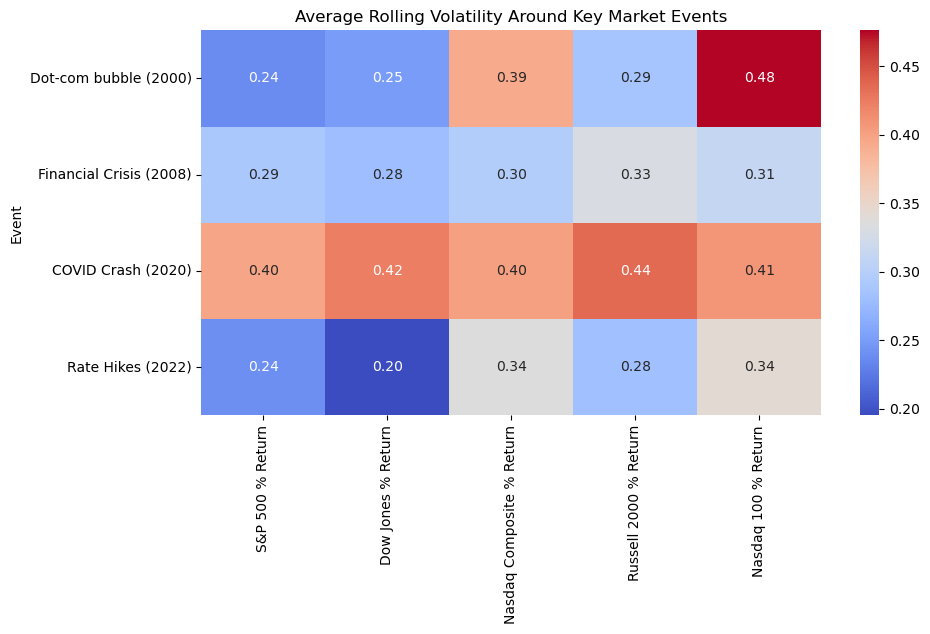

In [26]:

plt.figure(figsize=(10,5))
sns.heatmap(event_vol_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Average Rolling Volatility Around Key Market Events")
plt.ylabel("Event")
plt.show()

The table shows the average rolling volatility of each major U.S. index during key market events. The Nasdaq 100 consistently exhibits the highest volatility, particularly during the Dot-com bubble (0.48) and the COVID crash (0.41), reflecting its sensitivity to tech-driven market movements. The Russell 2000 also shows elevated volatility during crises, highlighting the increased risk in small-cap stocks. Broad-market indexes like the S&P 500 and Dow Jones generally display lower volatility, indicating relative stability, though all indexes experience spikes during periods of systemic market stress.

Dashboard

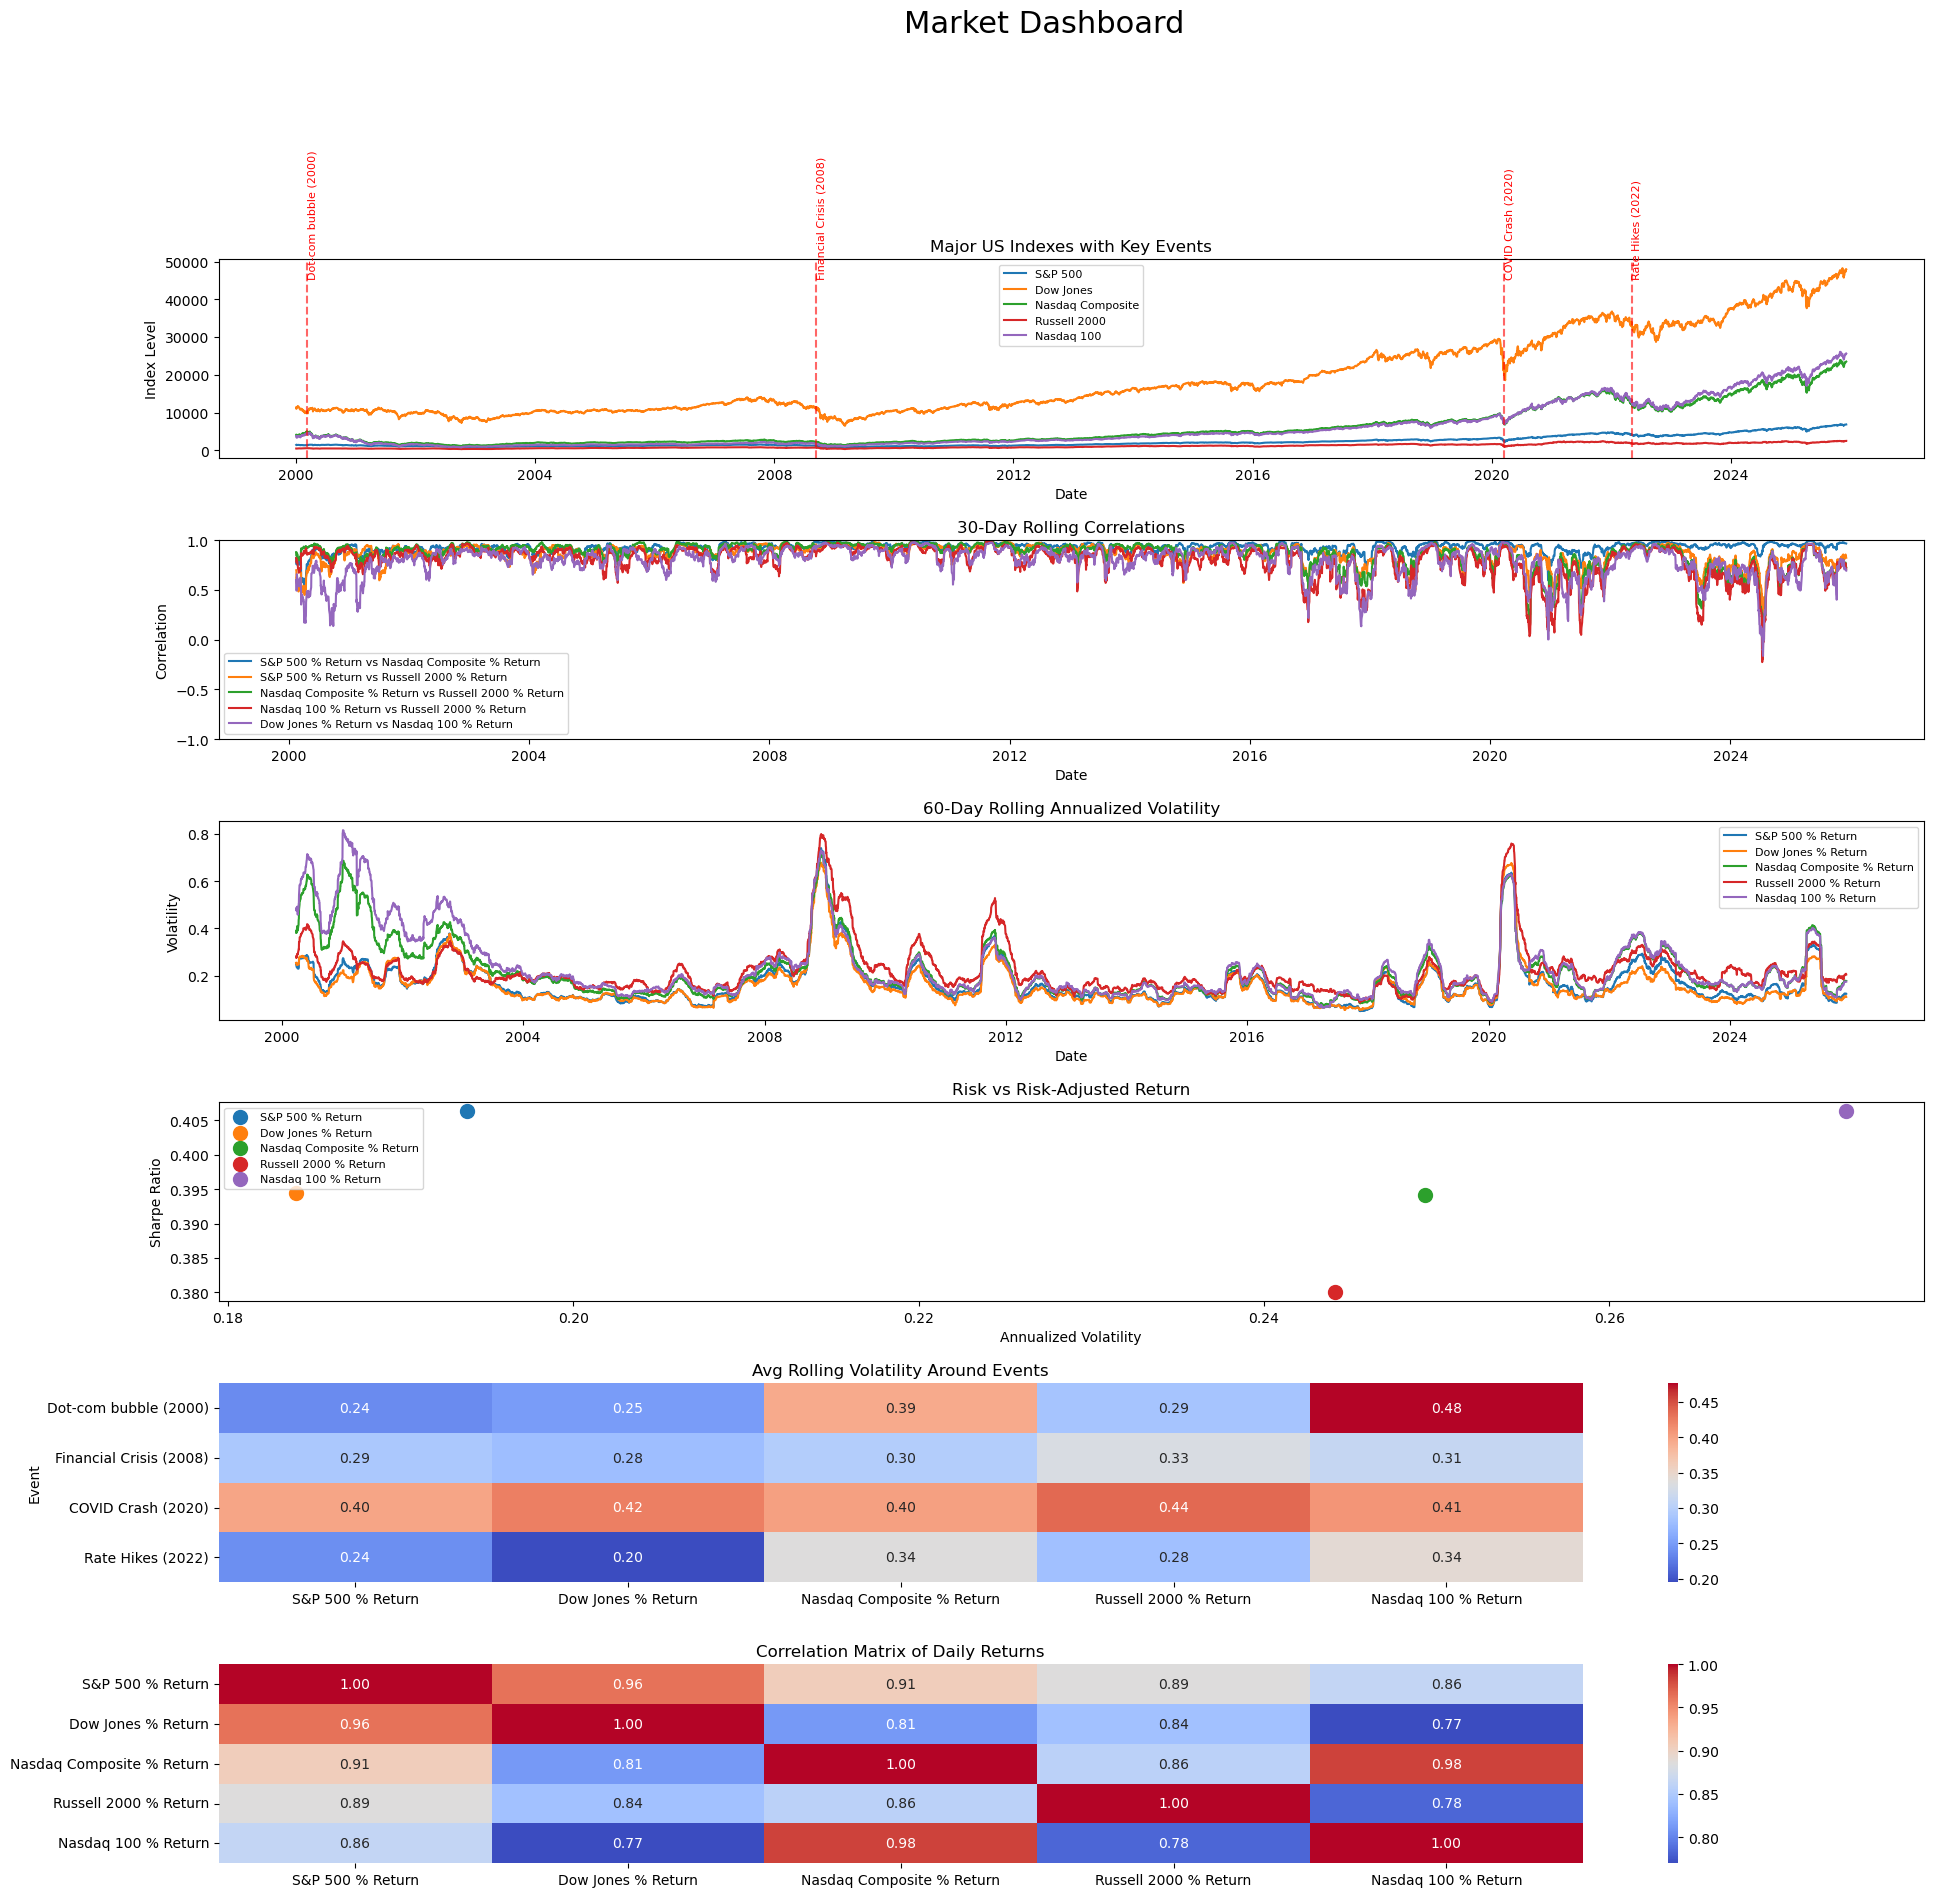

In [27]:

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(22, 25))
fig.suptitle("Market Dashboard", fontsize=22)

# Create a flexible grid: 7 rows x 4 columns
gs = gridspec.GridSpec(7, 4, figure=fig, height_ratios=[1,1,1,1,1,1,1.2], hspace=0.4, wspace=0.3)

# ------------------------------
# Index Levels with Events (full width)
ax1 = fig.add_subplot(gs[0, 0:4])
for col in index_cols:
    ax1.plot(df['Date'], df[col], label=col)
for event, date in events.items():
    ax1.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.6)
    ax1.text(pd.to_datetime(date), df[index_cols].max().max()*0.95, event,
             rotation=90, fontsize=8, color='red')
ax1.set_title("Major US Indexes with Key Events")
ax1.set_xlabel("Date")
ax1.set_ylabel("Index Level")
ax1.legend(fontsize=8)

# ------------------------------
# Rolling Correlations (all pairs, full width)
ax2 = fig.add_subplot(gs[1, 0:4])
for col1, col2 in pairs:
    rolling_corr = df[col1].rolling(window).corr(df[col2])
    ax2.plot(df['Date'], rolling_corr, label=f'{col1} vs {col2}')
ax2.set_title(f'{window}-Day Rolling Correlations')
ax2.set_ylabel("Correlation")
ax2.set_xlabel("Date")
ax2.set_ylim(-1, 1)
ax2.legend(fontsize=8)

# ------------------------------
# Rolling Volatility (full width)
ax3 = fig.add_subplot(gs[2, 0:4])
for col in return_cols:
    ax3.plot(df['Date'], rolling_vol[col], label=col)
ax3.set_title("60-Day Rolling Annualized Volatility")
ax3.set_ylabel("Volatility")
ax3.set_xlabel("Date")
ax3.legend(fontsize=8)

# ------------------------------
# Risk vs Sharpe Scatter (top of this section)
ax4 = fig.add_subplot(gs[3, 0:4])
for idx in volatility.index:
    ax4.scatter(volatility[idx], sharpe_ratio[idx], s=100, label=idx)
ax4.set_xlabel("Annualized Volatility")
ax4.set_ylabel("Sharpe Ratio")
ax4.set_title("Risk vs Risk-Adjusted Return")
ax4.legend(fontsize=8)

# ------------------------------
# Event Volatility Heatmap (beneath scatter)
ax5 = fig.add_subplot(gs[4, 0:4])
sns.heatmap(event_vol_df, annot=True, fmt=".2f", cmap="coolwarm", ax=ax5)
ax5.set_title("Avg Rolling Volatility Around Events")
ax5.set_ylabel("Event")

# ------------------------------
# Correlation Matrix Heatmap (beneath scatter, under event heatmap)
ax6 = fig.add_subplot(gs[5, 0:4])
sns.heatmap(df[return_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax6)
ax6.set_title("Correlation Matrix of Daily Returns")

plt.show()
